In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# вычисление второй производной
def calc_ypp(x, y):
    return np.arcsin(1 / (1 + x * x)) * y - np.sin(10 * x)

# численное решение задачи Коши
def solve_koshy(yp0):
    x = 0
    dx = 0.0001
    y = 1
    yp = yp0
    while x < 1:
        ypp = calc_ypp(x, y)
        y += yp * dx
        yp += ypp * dx
        x += dx
    return y




yp0_list = [] # список с первыми производными в 0
y1_list = []  # список со значениями в 1

yp0 = -10 # левая граница

# перебираем 1ю производную от -10 до 10
while yp0 <= 10:
    y1 = solve_koshy(yp0)
    print("y'(0) = {}, y(1) = {}".format(yp0, y1))
    yp0_list.append(yp0)
    y1_list.append(y1)
    yp0 += 0.5


y'(0) = -10, y(1) = -10.165878776390961
y'(0) = -9.5, y(1) = -9.582552468564492
y'(0) = -9.0, y(1) = -8.999226160738061
y'(0) = -8.5, y(1) = -8.415899852911574
y'(0) = -8.0, y(1) = -7.83257354508508
y'(0) = -7.5, y(1) = -7.249247237258643
y'(0) = -7.0, y(1) = -6.665920929432175
y'(0) = -6.5, y(1) = -6.082594621605738
y'(0) = -6.0, y(1) = -5.499268313779265
y'(0) = -5.5, y(1) = -4.915942005952802
y'(0) = -5.0, y(1) = -4.332615698126308
y'(0) = -4.5, y(1) = -3.749289390299885
y'(0) = -4.0, y(1) = -3.1659630824734104
y'(0) = -3.5, y(1) = -2.58263677464695
y'(0) = -3.0, y(1) = -1.9993104668204844
y'(0) = -2.5, y(1) = -1.4159841589940234
y'(0) = -2.0, y(1) = -0.8326578511675509
y'(0) = -1.5, y(1) = -0.24933154334108407
y'(0) = -1.0, y(1) = 0.33399476448537824
y'(0) = -0.5, y(1) = 0.9173210723118472
y'(0) = 0.0, y(1) = 1.5006473801383278
y'(0) = 0.5, y(1) = 2.0839736879647717
y'(0) = 1.0, y(1) = 2.667299995791246
y'(0) = 1.5, y(1) = 3.25062630361771
y'(0) = 2.0, y(1) = 3.8339526114441527
y'(

In [3]:
# находим интервал, в котором y(1) будет переходить через 2
for i in range(len(yp0_list) - 1):
    if (y1_list[i] <= 2) and (y1_list[i + 1] >= 2):
        left = yp0_list[i] 
        right = yp0_list[i + 1] 
        break;
print("left:", left, "y(1) =", solve_koshy(left))
print("right:", right, "y(1) =",solve_koshy(right))

left: 0.0 y(1) = 1.50064738014
right: 0.5 y(1) = 2.08397368796


In [4]:
# находим y'(0) методом половинного деления
while right - left > 1e-3:
    m = (left + right) / 2
    t = solve_koshy(m) 
    print(t)
    if (t == 2):
        break
    if (t < 2):
        left = m
    else:
        right = m
    
m = (left + right) / 2

1.79231053405
1.93814211101
2.01105789949
1.97460000525
1.99282895237
2.00194342593
1.99738618915
1.99966480754
2.00080411673


In [5]:
# решение задачи Коши, которое возвращает все точки
def solve_koshy_full(yp0):
    x = 0
    dx = 0.0001
    y = 1
    yp = yp0
    x_list = [x]
    y_list = [y]
    yp_list = [yp]
    while x < 1:
        ypp = calc_ypp(x, y)
        y += yp * dx
        yp += ypp * dx
        x += dx
        x_list.append(x)
        y_list.append(y)
        yp_list.append(yp)
    return (x_list, y_list, yp_list)

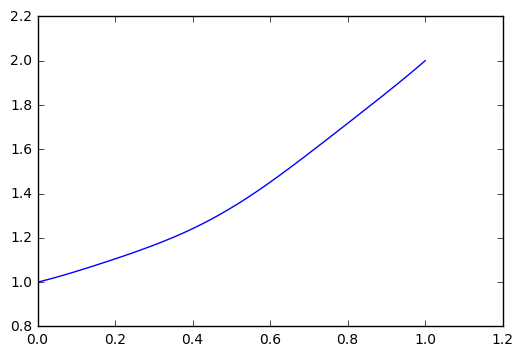

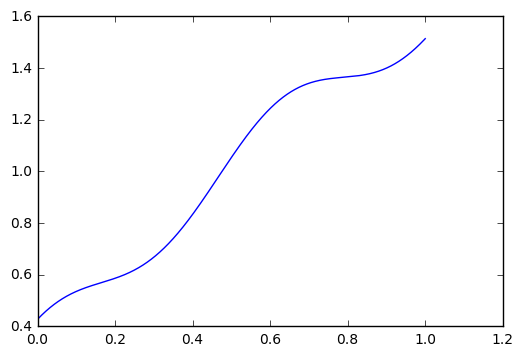

In [7]:
# график искомой функции
%matplotlib inline

x_l, y_l, yp_l = solve_koshy_full(m)

plt.plot(x_l, y_l)
plt.show()
plt.plot(x_l, yp_l) # график производной